# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Meiko Triputra
- **Email:** triputrameiko@gmail.com
- **ID Dicoding:** meiko_triputra

## Menentukan Pertanyaan Bisnis

- Bagaimana performa peminjaman sepeda tiap bulannya selama 2011 - 2012?
- Bagaimana persebaran data peminjaman sepeda per musim?
- Apakah terdapat hubungan jumlah peminjaman sepeda terhadap keadaan lingkungan dan musim?
- Pada jam berapa rata-rata peminjaman sepeda tertinggi dan terendah?
- Bagaimana tren jumlah peminjaman yang dilakukan oleh pengguna teregistrasi dan pengguna casual terhadap jumlah keseluruhan peminjaman sepeda perjamnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Data hour.csv

In [5]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Load Data day.csv

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Assessing Data hour_df

In [17]:
# Menampilkan informasi DataFrame hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Menghitung jumlah missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Menghitung jumlah duplikasi data
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [16]:
# Ringkasan parameter statistik data
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


dari data hour diatas, dapat didapatkan bahwa :
- Tipe data dteday dapat ditransformasikan dari tipe data object ke datetime
- Tipe data season, yr, mnth, weekday, dan weathersit dapat ditransformasikan dari tipe data int ke object
- Tidak terdapat missing value
- Tidak terdapat duplikasi data

#### Assessing Data day_df

In [8]:
# Menampilkan informasi DataFrame hour
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
# Menghitung jumlah missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
# Menghitung jumlah duplikasi data
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [20]:
# Ringkasan parameter statistik data
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


dari data day diatas, dapat didapatkan bahwa :
- Tipe data dteday dapat ditransformasikan dari tipe data object ke datetime
- Tipe data season, yr, mnth, weekday, dan weathersit dapat ditransformasikan dari tipe data int ke object
- Tidak terdapat missing value
- Tidak terdapat duplikasi data

### Cleaning Data

#### Cleaning Data hour_df

In [23]:
# Mengubah tipe data dteday dari object ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [26]:
# Melakukan mapping nilai pada column season
season_dict = {1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'}

if hour_df['season'].dtype != object:
  hour_df['season'] = hour_df['season'].map(season_dict)

In [60]:
# Melakukan mapping nilai pada column yr
year_dict = {0: 2011, 1:2012}

if hour_df['yr'].dtype != object:
    hour_df['yr'] = hour_df['yr'].map(year_dict)

In [32]:
# Melakukan transformasi nilai pada column mnth
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

In [29]:
# Melakukan transformasi nilai pada column weekday
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

In [41]:
# Melakukan mapping nilai pada column waethersit
weathersit_dict = {
    1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
  }

if hour_df['weathersit'].dtype != object:
  hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_dict)

In [61]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [62]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


#### Cleaning Data day_df

In [44]:
# Mengubah tipe data dteday dari object ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [45]:
# Melakukan mapping nilai pada column season
season_dict = {1:'Springer', 2:'Summer', 3:'Fall', 4:'Winter'}

if day_df['season'].dtype != object:
  day_df['season'] = day_df['season'].map(season_dict)

In [63]:
# Melakukan mapping nilai pada column yr
year_dict = {0: 2011, 1:2012}

if day_df['yr'].dtype != object:
    day_df['yr'] = day_df['yr'].map(year_dict)

In [46]:
# Melakukan transformasi nilai pada column mnth
day_df['mnth'] = day_df['dteday'].dt.month_name()

In [47]:
# Melakukan transformasi nilai pada column weekday
day_df['weekday'] = day_df['dteday'].dt.day_name()

In [48]:
# Melakukan mapping nilai pada column waethersit
weathersit_dict = {
    1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
  }

if day_df['weathersit'].dtype != object:
  day_df['weathersit'] = day_df['weathersit'].map(weathersit_dict)

In [64]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [65]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore Data hour_day_df

In [101]:
# Menggabungkan data hour_df dan day_df
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="inner",
    left_on="dteday",
    right_on="dteday",
    suffixes=("", "_daily")
)

# Melakukan drop terhadap beberapa column yang dirasa tidak perlu
for column in hour_day_df.columns:
    if "_daily" in column: 
        if column != "cnt_daily" and column != "casual_daily" and column != "registered_daily":
            hour_day_df = hour_day_df.drop([column], axis=1)

hour_day_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16,331,654,985
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40,331,654,985
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32,331,654,985
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13,331,654,985
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1,331,654,985


In [104]:
# Rata-rata dan jumlah peminjaman sepeda berdasarkan musim
hour_day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["mean","sum"],
    "registered": ["mean","sum"],
    "cnt": ["mean","sum"]
})

instant     casual          registered                 cnt         
         nunique       mean     sum        mean     sum        mean      sum
season                                                                      
Fall        4496  50.287144  226091  185.729093  835038  236.016237  1061129
Springer    4242  14.290901   60622   96.823668  410726  111.114569   471348
Summer      4409  46.160581  203522  162.183488  715067  208.344069   918589
Winter      4232  30.666824  129782  168.202032  711831  198.868856   841613

In [113]:
# Rata-rata dan jumlah peminjaman sepeda berdasarkan tahun,bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
hour_day_df["mnth"] = pd.Categorical(hour_day_df["mnth"], categories=month_order, ordered=True)

hour_day_df.groupby(by=["yr","mnth"]).agg({
    "instant": "nunique",
    "casual": ["mean","sum"],
    "registered": ["mean","sum"],
    "cnt": ["mean","sum"]
}).sort_values(by=["yr","mnth"])

C:\Users\user\AppData\Local\Temp\ipykernel_20248\1581914526.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_day_df.groupby(by=["yr","mnth"]).agg({


instant     casual         registered                 cnt  \
               nunique       mean    sum        mean     sum        mean   
yr   mnth                                                                  
2011 January       688   4.466570   3073   51.040698   35116   55.507267   
     February      649   9.617874   6242   64.673344   41973   74.291217   
     March         730  17.569863  12826   70.163014   51219   87.732877   
     April         719  31.079277  22346  100.867872   72524  131.947149   
     May           744  41.733871  31050  140.821237  104771  182.555108   
     June          720  42.516667  30612  156.805556  112900  199.322222   
     July          744  48.994624  36452  140.979839  104889  189.974462   
     August        731  39.455540  28842  147.536252  107849  186.991792   
     September     717  37.022315  26545  140.687587  100873  177.709902   
     October       743  33.946164  25222  132.286676   98289  166.232840   
     November      719  21.688456  15594  120.407510   86573  142.095967   
     December      741  11.400810   8448  106.443995   78875  117.844804   
2012 January       741  12.103914   8969  118.454791   87775  130.558704   
     February      692  12.602601   8721  136.439306   94416  149.041908   
     March         743  42.554509  31618  179.349933  133257  221.904441   
     April         718  53.559889  38456  189.091922  135768  242.651811   
     May           744  59.455645  44235  203.803763  151630  263.259409   
     June          720  60.130556  43294  221.577778  159536  281.708333   
     July          744  56.055108  41705  217.610215  161902  273.665323   
     August        744  58.060484  43197  230.250000  171306  288.310484   
     September     720  60.802778  43778  242.770833  174795  303.573611   
     October       708  48.782486  34538  232.066384  164303  280.848870   
     November      718  29.260446  21009  183.363510  131655  212.623955   
     December      742  17.850404  13245  148.878706  110468  166.729111   

                        
                   sum  
yr   mnth               
2011 January     38189  
     February    48215  
     March       64045  
     April       94870  
     May        135821  
     June       143512  
     July       141341  
     August     136691  
     September  127418  
     October    123511  
     November   102167  
     December    87323  
2012 January     96744  
     February   103137  
     March      164875  
     April      174224  
     May        195865  
     June       202830  
     July       203607  
     August     214503  
     September  218573  
     October    198841  
     November   152664  
     December   123713

In [112]:
# Rata-rata dan jumlah peminjaman sepeda berdasarkan hari
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
hour_day_df["weekday"] = pd.Categorical(hour_day_df["weekday"], categories=day_order, ordered=True)

hour_day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["mean","sum"],
    "registered": ["mean","sum"],
    "cnt": ["mean","sum"]
}).sort_values(by="weekday")

C:\Users\user\AppData\Local\Temp\ipykernel_20248\3958235110.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_day_df.groupby(by="weekday").agg({


instant     casual          registered                 cnt        
          nunique       mean     sum        mean     sum        mean     sum
weekday                                                                     
Sunday       2502  56.163469  140521  121.305356  303506  177.468825  444027
Monday       2479  28.553449   70784  155.191206  384719  183.744655  455503
Tuesday      2453  23.580514   57843  167.658377  411266  191.238891  469109
Wednesday    2475  23.159192   57319  167.971313  415729  191.130505  473048
Thursday     2471  24.872521   61460  171.564144  423935  196.436665  485395
Friday       2487  31.458786   78238  164.677121  409552  196.135907  487790
Saturday     2512  61.246815  153852  128.962978  323955  190.209793  477807

Ada beberapa insight yang kita dapatkan dari exploration data hour_day yang telah di merge diatas yaitu:
- Total jumlah peminjaman sepeda terbanyak terjadi pada musim gugur sebanyak 1.061.129 peminjaman dan paling sedikit pada musim semi sebanyak 471.348 peminjaman
- Total jumlah peminjaman sepeda terbanyak terdapat pada bulan September 2012 sebanyak 218.573 peminjaman dan paling sedikit pada Januari 2011 sebanyak 38.189 peminjaman
- Hari dengan jumlah total peminjaman sepeda terbanyak terdapat pada hari Jum'at sebanyak 487.790 peminjaman
- Hari dengan jumlah total peminjaman sepeda paling sedikit terdapat pada hari Senin sebanyak 455.503 peminjaman

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa peminjaman sepeda tiap bulannya selama 2011 - 2012?

C:\Users\user\AppData\Local\Temp\ipykernel_20248\3638906426.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_count_per_year_df = hour_day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()


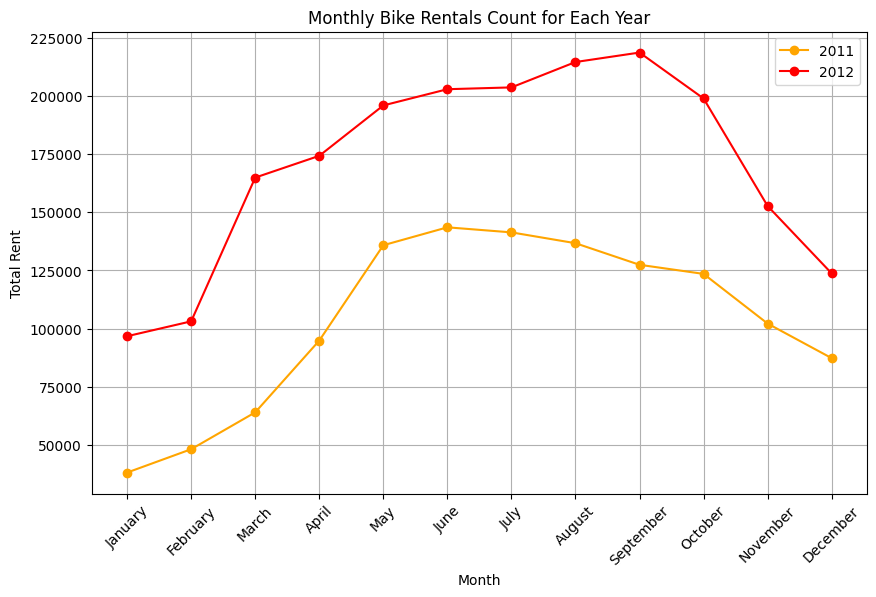

In [214]:
# Menetapkan data yang digunakan
monthly_count_per_year_df = hour_day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Membagi data berdasarkan tahun
df_2011 = monthly_count_per_year_df[monthly_count_per_year_df['yr'] == 2011]
df_2012 = monthly_count_per_year_df[monthly_count_per_year_df['yr'] == 2012]

# Melakukan plot data
plt.figure(figsize=(10, 6))
plt.plot(df_2011['mnth'], df_2011['cnt'], marker="o", label='2011', color='orange')
plt.plot(df_2012['mnth'], df_2012['cnt'], marker="o", label='2012', color='red')

# Memberi label pada sumbu x dan y
plt.xlabel('Month')
plt.ylabel('Total Rent')

# Memberikan rotasi sebesar 45 derajat ticks sumbu x
plt.xticks(rotation=45)

# Memberikan judul pada plot
plt.title('Monthly Bike Rentals Count for Each Year')

# Menambahkan legend terhadap label yang telah didefinisikan
plt.legend()

# Mengaplikasikan grid pada plot
plt.grid()

# Menampilkan plot
plt.show()


### Pertanyaan 2: Bagaimana persebaran data peminjaman sepeda per musim?

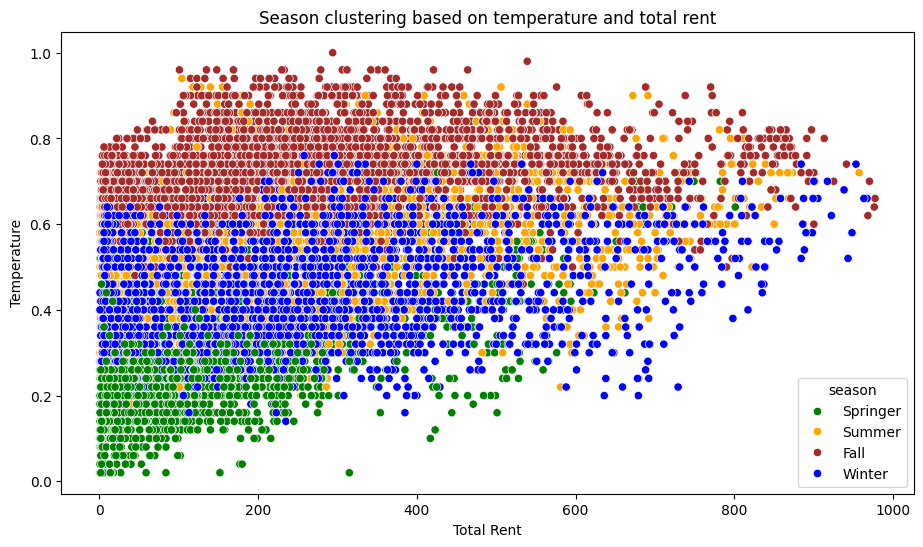

In [188]:
# Melakukan plot data
plt.figure(figsize=(11,6))

# Membuat scatterplot untuk melakukan clustering data musim berdasarkan temperature dan jumlah peminjaman 
sns.scatterplot(x='cnt', y='temp', data=hour_day_df, hue='season', palette=['green','orange','brown','blue'])

plt.xlabel("Total Rent")
plt.ylabel("Temperature")
plt.title("Season clustering based on temperature and total rent")
plt.show()

### Pertanyaan 3: Apakah terdapat hubungan jumlah peminjaman sepeda terhadap keadaan lingkungan dan musim?

C:\Users\user\AppData\Local\Temp\ipykernel_20248\4146659795.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['season'] = heatmap_df['season'].replace({"Springer": 1, "Summer": 2, "Fall": 3, "Winter": 4})
C:\Users\user\AppData\Local\Temp\ipykernel_20248\4146659795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_df['season'] = heatmap_df['season'].replace({"Springer": 1, "Summer": 2, "Fall": 3, "Winter": 4})


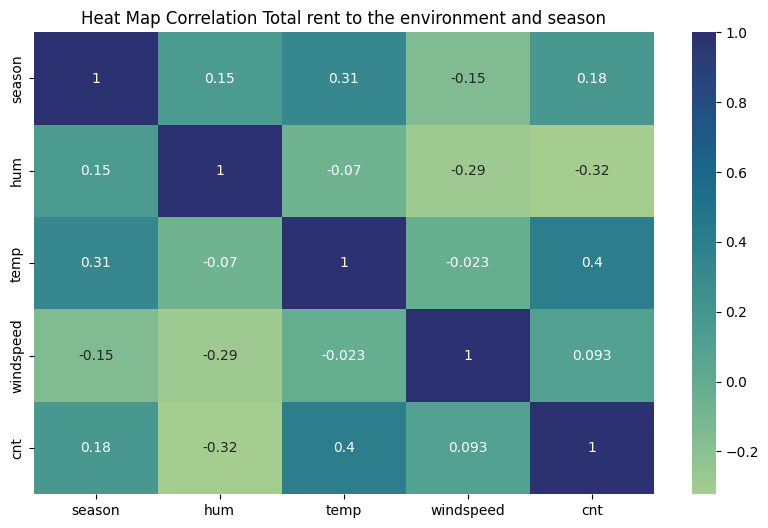

In [197]:
# Menetapkan data yang digunakan
heatmap_df=hour_day_df[['season', 'hum', 'temp', 'windspeed', 'cnt']]
heatmap_df['season'] = heatmap_df['season'].replace({"Springer": 1, "Summer": 2, "Fall": 3, "Winter": 4})

# Membuat heatmap untuk menunjukkan korelasi jumlah peminjaman sepeda terhadap elemen lingkungan dan musim
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df.corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Heat Map Correlation Total rent to the environment and season")
plt.show()

### Pertanyaan 4: Pada jam berapa rata-rata peminjaman sepeda tertinggi dan terendah?

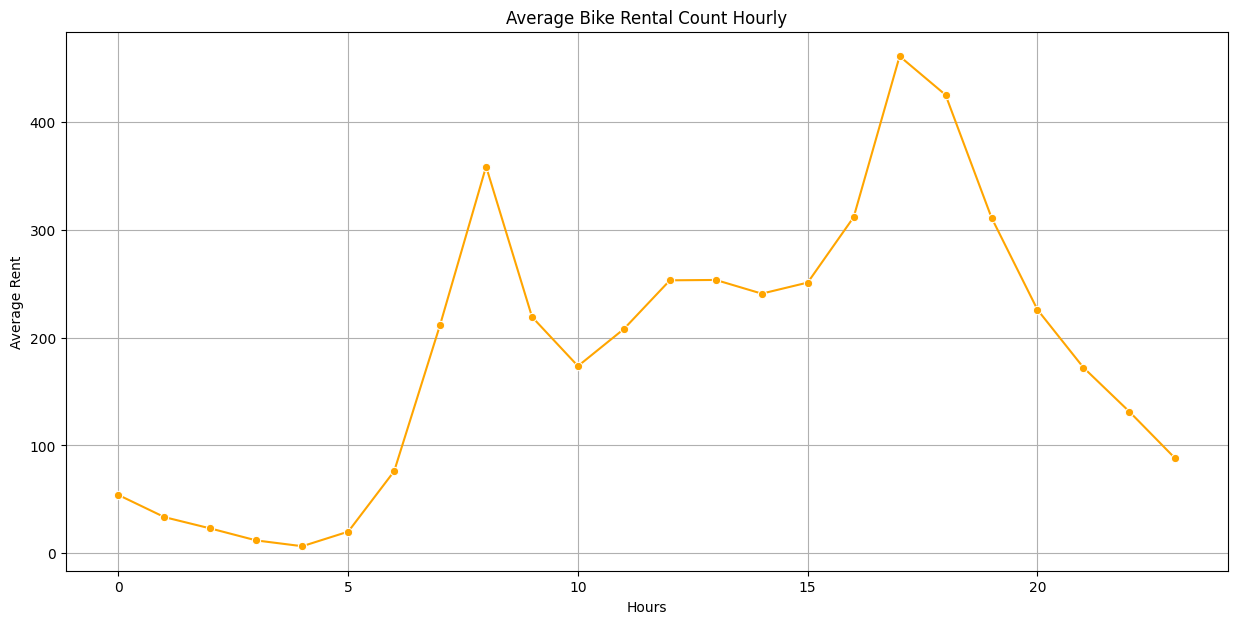

In [213]:
# Menetapkan data yang digunakan
mean_hourly_df = hour_day_df.groupby('hr')['cnt'].mean().reset_index()

# Membuat plot line chart
plt.figure(figsize = (15,7))
ax = sns.lineplot(data=mean_hourly_df, x="hr", y="cnt", color='orange', errorbar=None, marker="o")
plt.xlabel("Hours")
plt.ylabel("Average Rent")
plt.title("Average Bike Rental Count Hourly")
plt.grid()
plt.show()

### Pertanyaan 5: Bagaimana tren jumlah peminjaman yang dilakukan oleh pengguna teregistrasi dan pengguna casual terhadap jumlah keseluruhan peminjaman sepeda perjam?

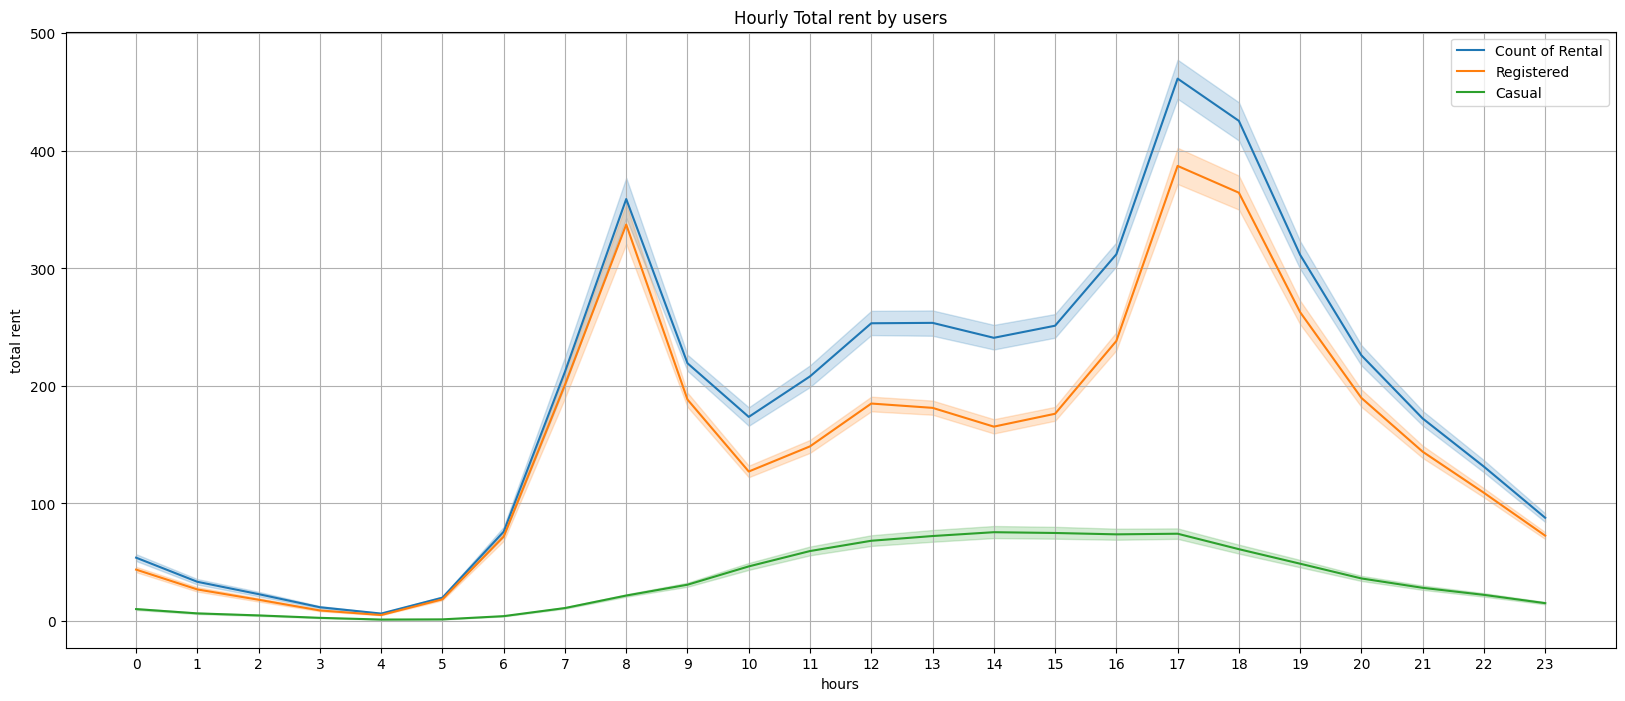

In [215]:
# Menyiapkan data yang digunakan
count_rent_df=hour_day_df[['hr','registered','casual','cnt']]

# Membuat plot line chart
plt.figure(figsize=(20,8))
plt.xticks([i for i in range(24)])
plt.xlabel("hours")
plt.ylabel("total rent")
plt.title("Hourly Total rent by users")
sns.lineplot(x="hr", y="cnt", data=count_rent_df, label='Count of Rental')
sns.lineplot(x="hr", y="registered", data=count_rent_df, label='Registered')
sns.lineplot(x="hr", y="casual", data=count_rent_df, label='Casual')
plt.grid()
plt.show()

## Conclusion

- Bagaimana performa peminjaman sepeda tiap bulannya selama 2011 - 2012?
  
  Performa dari data bike sharing cukup positif. Hal ini ditandai dengan naiknya total peminjaman tiap bulan dari tahun sebelumnya. Kenaikan signifikan terjadi pada bulan Februari-Maret 2012, Akan tetapi pada data terakhir tren terlihat menurun dengan Penurunan signifikan terjadi pada bulan Oktober-November 2012.
  
- Bagaimana persebaran data peminjaman sepeda per musim?

  Pada hasil visualisasi menggunakan scatterplot diatas, dapat dilihat bahwa pengguna banyak melakukan peminjaman sepeda pada musim gugur dan musim panas. Hal ini didasarkan pada keadaan cuaca yang hangat yang membuat pengguna cenderung lebih lama diluar ruangan.
  
- Apakah terdapat hubungan jumlah peminjaman sepeda terhadap keadaan lingkungan dan musim?

  Pada hasil visualisasi menggunakan heatmap diatas, Jumlah peminjaman sepeda tidak memiliki korelasi yang berkesesuaian terhadap kelembaban dan sedikit memiliki korelasi yang berkesesuaian terhadap kecepatan angin, suhu, dan musim. Ini menjadikan acuan bahwa keadaan lingkungan dan musim juga memiliki pengaruh terhadap jumlah peminjaman sepeda.
  
- Pada jam berapa rata-rata peminjaman sepeda tertinggi dan terendah?

  Dapat dilihat jam dengan rata-rata peminjaman sepeda terendah pada jam 12 malam hingga 5 pagi. Ini merupakan jam istirahat dan jam tidur bagi seluruh orang. Sedangkan jam dengan rata-rata peminjaman sepeda tertinggi yaitu pada jam 8 pagi, 5 dan 6 sore. Ini merupakan jam dimana orang pergi dan pulang bekerja. 
  
- Bagaimana tren jumlah peminjaman yang dilakukan oleh pengguna teregistrasi dan pengguna casual terhadap jumlah keseluruhan peminjaman sepeda perjamnya?

  Dari total peminjaman sepeda dan total penggunanya yang teregistrasi atau kasual. Didapati bahwa hampir semua pengguna telah teregistrasi. Ini menandakan bahwa program peminjaman sepeda atau bike sharing ini merupakan program yang memiliki manfaat berkelanjutan dan 
  